This code converts an image of a lily slice into a mask of the tepal cross-section. However, it requires the user to manually identify the intensity of a pixel in the tepal, and the binarize function may isolate more than just the tepals if the pixel intensity is close to another. 

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from scipy.ndimage import binary_fill_holes
from skimage.feature import canny
from skimage.filters import try_all_threshold

In [11]:
#access test image on google drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


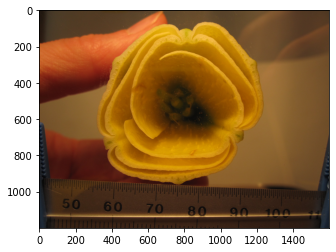

In [12]:
lily = plt.imread('/content/drive/MyDrive/testlilyslice.jpeg')
plt.imshow(lily)

(-0.5, 1599.5, 1199.5, -0.5)

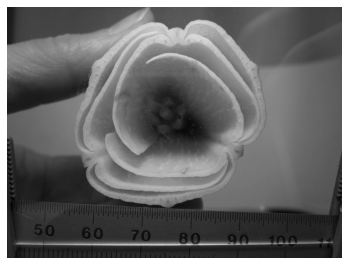

In [13]:
#convert the lily image to black and white
lily_gr = rgb2gray(lily)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(lily_gr, cmap = 'gray')
ax.axis('off')


In [14]:
def binarize(im, turn):
  w, h = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 1'

  for a,i in enumerate(im):
    for b,j in enumerate(i):
      if j>1:
        print(error_code)
      if j>turn:
        binary_im[a,b]=1
  return binary_im

In [ ]:
#Before utilizing the binarize function, the intensity of the lily tepal must be obtained.

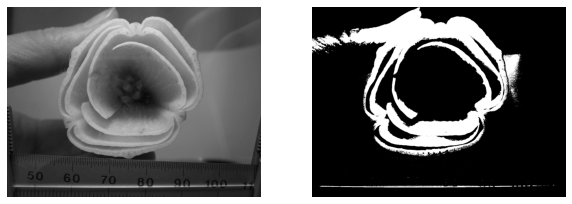

In [ ]:
#Utilize the binarize function
intensity = 0.47
lily_bi = binarize(lily_gr, intensity)

#plot and compare
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily_gr, cmap='gray')
ax[1].imshow(lily_bi, cmap='gray')

for axi in ax:
  axi.axis('off')

In [ ]:
#Write a new function that binarizes the colored image based on a given pixel color 

In [31]:
def color_binarize(im, r, g, b):
  w, h, a = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 255'

  for x,i in enumerate(im):
    for y,j in enumerate(i):
      temp_r, temp_g, temp_b = j
      if temp_r == r and temp_g == g and temp_b == b:
        binary_im[x,y]=1
      else:
        binary_im[x,y]=0
  return binary_im

In [32]:
#before utilizing the function, use the colorpicker in powerpoint to intentify the rgb values of a pixel in the outer tepal
rgb_pixel = [255,168,55]

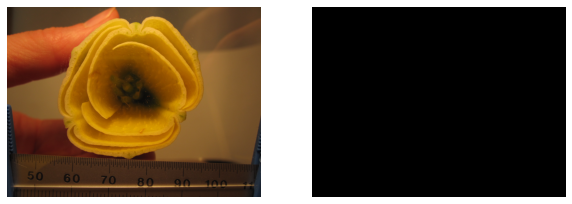

In [33]:
#Utilize the color_binarize function

lily_mask = color_binarize(lily, rgb_pixel[0], rgb_pixel[1], rgb_pixel[2])

#plot and compare
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily)
ax[1].imshow(lily_mask, cmap='gray')

for axi in ax:
  axi.axis('off')

In [30]:
print(lily_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Test a range to see if that is the issue
def color_binarize(im, r, g, b):
  w, h, a = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 255'

  for x,i in enumerate(im):
    for y,j in enumerate(i):
      temp_r, temp_g, temp_b = j
      if temp_r in range(r-5,r+5) and temp_g in range(g-5,g+5) and temp_b in range(b-5,b+5):
        binary_im[x,y]=1
      else:
        binary_im[x,y]=0
  return binary_im

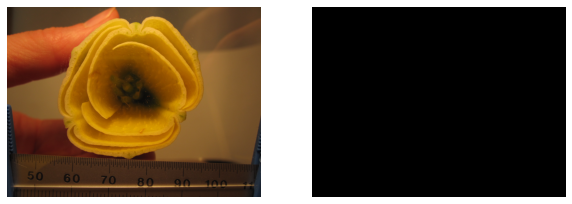

In [34]:
#Utilize the color_binarize function

lily_mask = color_binarize(lily, rgb_pixel[0], rgb_pixel[1], rgb_pixel[2])

#plot and compare
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily)
ax[1].imshow(lily_mask, cmap='gray')

for axi in ax:
  axi.axis('off')

In [ ]:
#I have some kind of bug - nothing is satisfying the function